In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

# 获取数据

In [3]:
file_data = pd.read_csv("./data/链家北京租房数据.csv")
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [4]:
file_data.shape

(8223, 5)

In [5]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [6]:
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


# 数据基本处理

## 重复值和空值处理

In [8]:
# 检测重复值
# file_data.duplicated()
file_data = file_data.drop_duplicates()

In [9]:
file_data.shape

(5773, 5)

In [10]:
# 空值处理
file_data = file_data.dropna()

In [11]:
file_data.shape

(5773, 5)

## 数据类型转换
### 面积数据类型转换

In [13]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [17]:
# 单个值实现
file_data["面积(㎡)"].values[0][:-2]

'59.11'

In [20]:
# 创建一个空数组
data_new = np.array([])
data_area = file_data["面积(㎡)"].values
for i in data_area:
    data_new = np.append(data_new, np.array(i[:-2]))

In [19]:
data_area

array(['59.11平米', '56.92平米', '40.57平米', ..., '92.41平米', '71.81平米',
       '35.43平米'], dtype=object)

In [21]:
data_new

array(['59.11', '56.92', '40.57', ..., '92.41', '71.81', '35.43'],
      dtype='<U32')

In [22]:
# 转换data_new中的数据类型
data_new = data_new.astype(np.float64)

In [23]:
data_new

array([59.11, 56.92, 40.57, ..., 92.41, 71.81, 35.43])

In [24]:
file_data.loc[:,"面积(㎡)" ] = data_new

In [25]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


### 户型表达方式替换

In [26]:
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4房间2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [29]:
house_data = file_data["户型"]
temp_list = []

for i in house_data:
    new_info = i.replace("房间","室")
    temp_list.append(new_info)

In [31]:
file_data.loc[:,"户型"] = temp_list

In [32]:
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


# 图表分析
## 房源数量、位置分布分析

In [33]:
new_df = pd.DataFrame({"区域":file_data["区域"].unique(), "数量":[0]*13})

In [34]:
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [36]:
# 获取每个区域房源数量
area_count = file_data.groupby(by="区域").count()

In [37]:
new_df["数量"] = area_count.values

In [39]:
new_df.sort_values(by="数量", ascending=False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


## 户型数量分析

In [40]:
house_data = file_data["户型"]
house_data

0       1室0厅
1       3室0厅
2       1室1厅
3       2室1厅
4       1室1厅
        ... 
8218    3室1厅
8219    4室2卫
8220    3室1厅
8221    2室1厅
8222    1室1厅
Name: 户型, Length: 5773, dtype: object

In [41]:
def all_house(arr):
    key = np.unique(arr)
    result={}
    
    for k in key:
        mask = (arr == k)
        arr_new =  arr[mask]
        v = arr_new.size
        result[k] = v
    
    return result
        

In [43]:
house_info = all_house(house_data)

In [44]:
# 去掉统计数量较少的值
house_data = dict((key, value)for key, value in house_info.items() if value > 50)

In [46]:
show_houses = pd.DataFrame({"户型": [x for x in house_data.keys()],
              "数量": [x for x in house_data.values()]})

In [47]:
show_houses

,户型,数量
0,1室0厅,244
1,1室1卫,126
2,1室1厅,844
3,2室1卫,120
4,2室1厅,2249
5,2室2厅,265
6,3室1卫,92
7,3室1厅,766
8,3室2厅,489
9,4室1厅,58


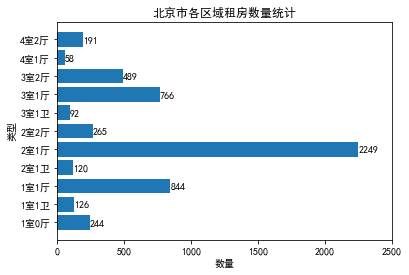

In [57]:
# 图形展示房屋类型

house_type = show_houses["户型"]
house_type_num = show_houses["数量"]

plt.barh(range(11), house_type_num)

plt.yticks(range(11), house_type)
plt.xlim(0, 2500)

plt.title("北京市各区域租房数量统计")
plt.xlabel("数量")
plt.ylabel("类型")

# 给每个条上面添加具体数字
for x, y in enumerate(house_type_num):
    # print(x,y)
    plt.text(y+1, x-0.2, "%s" % y)

plt.show()

## 平均租金分析

In [58]:
df_all = pd.DataFrame({"区域": file_data["区域"].unique(),
             "房租总金额": [0]*13,
             "总面积":[0]*13})

In [59]:
df_all

,区域,房租总金额,总面积
0,东城,0,0
1,丰台,0,0
2,亦庄开发区,0,0
3,大兴,0,0
4,房山,0,0
5,昌平,0,0
6,朝阳,0,0
7,海淀,0,0
8,石景山,0,0
9,西城,0,0


In [60]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


In [66]:
sum_price = file_data["价格(元/月)"].groupby(file_data["区域"]).sum()
sum_area = file_data["面积(㎡)"].groupby(file_data["区域"]).sum()

In [69]:
df_all["房租总金额"] = sum_price.values
df_all["总面积"] = sum_area.values

In [70]:
df_all

,区域,房租总金额,总面积
0,东城,3945550,27353.99
1,丰台,4404893,50922.79
2,亦庄开发区,1318400,15995.53
3,大兴,2286950,35884.15
4,房山,726750,15275.41
5,昌平,2521515,35972.92
6,朝阳,20281396,166921.72
7,海淀,7279350,57210.39
8,石景山,1156500,13956.67
9,西城,5636975,37141.64


In [73]:
# 计算各个区域每平方米的房租
df_all["每平米租金（元）"] = round(df_all["房租总金额"] / df_all["总面积"], 2)

In [74]:
df_all

,区域,房租总金额,总面积,每平米租金（元）
0,东城,3945550,27353.99,144.24
1,丰台,4404893,50922.79,86.50
2,亦庄开发区,1318400,15995.53,82.42
3,大兴,2286950,35884.15,63.73
4,房山,726750,15275.41,47.58
5,昌平,2521515,35972.92,70.09
6,朝阳,20281396,166921.72,121.50
7,海淀,7279350,57210.39,127.24
8,石景山,1156500,13956.67,82.86
9,西城,5636975,37141.64,151.77


In [75]:
df_merge = pd.merge(new_df, df_all)

In [76]:
df_merge

,区域,数量,房租总金额,总面积,每平米租金（元）
0,东城,282,3945550,27353.99,144.24
1,丰台,577,4404893,50922.79,86.50
2,亦庄开发区,147,1318400,15995.53,82.42
3,大兴,362,2286950,35884.15,63.73
4,房山,180,726750,15275.41,47.58
5,昌平,347,2521515,35972.92,70.09
6,朝阳,1597,20281396,166921.72,121.50
7,海淀,605,7279350,57210.39,127.24
8,石景山,175,1156500,13956.67,82.86
9,西城,442,5636975,37141.64,151.77


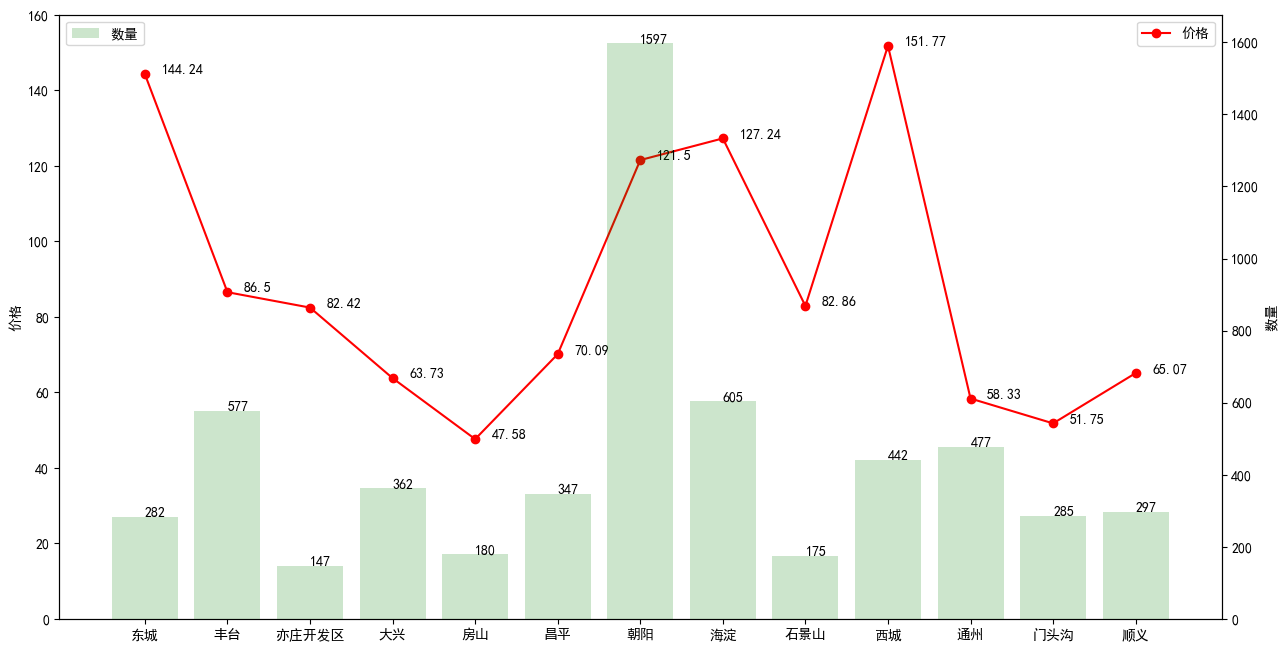

In [101]:
# 图形可视化

num = df_merge["数量"]
price = df_merge["每平米租金（元）"]
lx = df_merge["区域"]
l = [i for i in range(13)]

fig = plt.figure(figsize=(15, 8), dpi=100)

# 显示折线图
ax1 = fig.add_subplot(111)
ax1.plot(l, price, "or-", label="价格")
for i, (_x, _y) in enumerate(zip(l, price)):
    plt.text(_x+0.2, _y, price[i])

ax1.set_ylim([0, 160])
ax1.set_ylabel("价格")
plt.legend(loc="upper right")

# 显示条形图
ax2 = ax1.twinx()
plt.bar(l, num, label="数量", alpha=0.2, color="green")
for i, (_x, _y) in enumerate(zip(l, num)):
    plt.text(_x, _y, num[i])
    
ax2.set_ylabel("数量")
plt.legend(loc="upper left")
plt.xticks(l, lx)

plt.show()

## 面积基本分析

In [102]:
# 查看房屋的最大面积和最小面积
print('房屋最大面积是%d平米'%(file_data['面积(㎡)'].max()))
print('房屋最小面积是%d平米'%(file_data['面积(㎡)'].min()))
# 查看房租的最高值和最小值
print('房租最高价格为每月%d元'%(file_data['价格(元/月)'].max()))
print('房屋最低价格为每月%d元'%(file_data['价格(元/月)'].min()))

房屋最大面积是1133平米
房屋最小面积是11平米
房租最高价格为每月150000元
房屋最低价格为每月566元


In [104]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
area_cut = pd.cut(list(file_data["面积(㎡)"]), area_divide)

In [105]:
area_cut_num = area_cut.describe()
area_cut_num

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


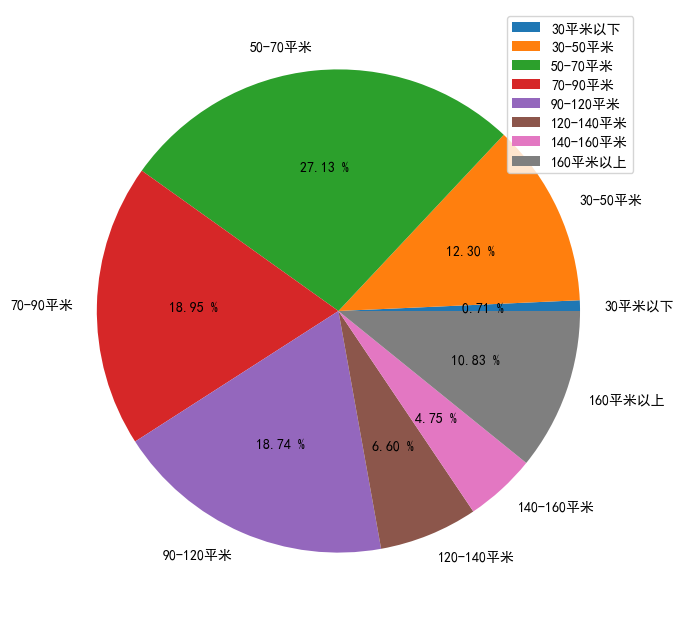

In [112]:
# 图形可视化
area_per = (area_cut_num["freqs"].values)*100
labels = ['30平米以下', '30-50平米', '50-70平米', '70-90平米',
          '90-120平米', '120-140平米', '140-160平米', '160平米以上']
plt.figure(figsize=(20, 8), dpi=100)
plt.axes()

plt.pie(x=area_per, labels=labels, autopct="%.2f %%")

plt.legend()

plt.show()

In [108]:
area_per

array([ 0.71020267, 12.29863156, 27.1262775 , 18.95028581, 18.74242162,
        6.5996882 ,  4.74623246, 10.82626018])